In [1]:
import numpy as np
import matplotlib.pyplot as plt
from configs.RecursiveVPSDE.recursive_PostMeanScore_fOU_T256_H05_tl_5data import get_config as get_config

In [9]:
config= get_config()
fOU_drifts = np.load("/Users/marcos/GitHubRepos/FractionalBrownianMotion/experiments/generative_modelling/RecursiveVPSDE/ParameterEstimation/PM/fOU_DriftSampling_960Epoch_Drifts.npy")[:, ::-1]
fOU_pathvals = np.load("/Users/marcos/GitHubRepos/FractionalBrownianMotion/experiments/generative_modelling/RecursiveVPSDE/ParameterEstimation/PM/fOU_DriftSampling_960Epoch_PathValues.npy")

In [10]:
true_drifts = (-config.mean_rev*fOU_pathvals).reshape((fOU_pathvals.shape[0],1))*np.ones_like(fOU_drifts)

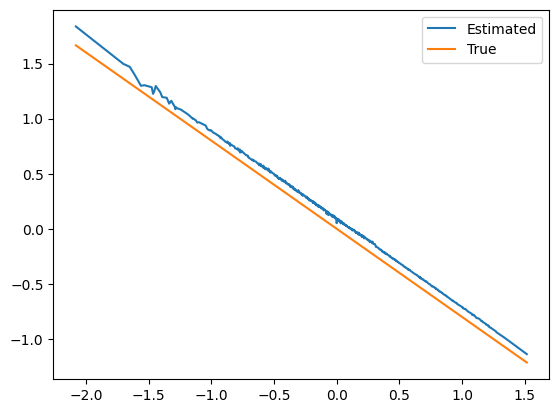

In [34]:
plt.plot(fOU_pathvals, fOU_drifts[:, 9999], label="Estimated")
plt.plot(fOU_pathvals, true_drifts[:, 0], label=True)
plt.legend()
plt.show()

In [33]:
errs = np.abs(fOU_drifts - true_drifts)
avg_across_path_errs = np.mean(errs, axis=0)
print(np.argmin(avg_across_path_errs))

9999


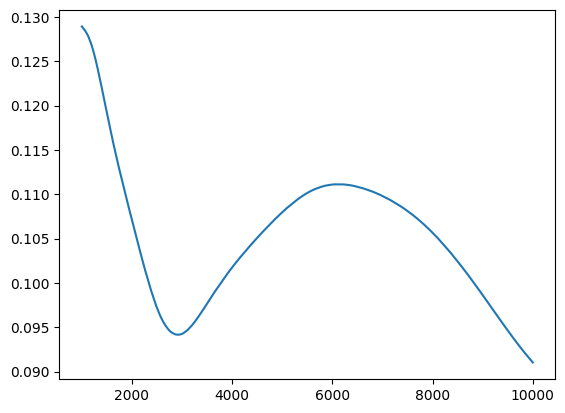

In [32]:
plt.plot(np.arange(0, config.max_diff_steps)[1000:], avg_across_path_errs[1000:])